In [ ]:
!pip install intake-xarray
!pip install requests
!pip install aiohttp

In [5]:
import intake
catalog = intake.open_catalog("https://s3.imk-ifu.kit.edu:8082/climatedata/catalog.yaml")
print(list(catalog))

['mswx v1.0e', 'eobs v24.0e', 'MERRA2 tavgM 2d aer NX', 'ERA5 daily surface variables']


In [17]:
catalog['eobs v24.0e'].to_dask()

<xarray.Dataset>
Dimensions:       (latitude: 465, longitude: 705, height_2m: 0, time: 26114)
Coordinates:
  * height_2m     (height_2m) float64 
  * latitude      (latitude) float64 25.05 25.15 25.25 ... 71.25 71.35 71.45
  * longitude     (longitude) float64 -24.95 -24.85 -24.75 ... 45.25 45.35 45.45
  * time          (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2021-06-30
Data variables: (12/15)
    elevation     (latitude, longitude) float32 dask.array<chunksize=(465, 705), meta=np.ndarray>
    msl           (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    msl_spread    (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    r             (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    r_spread      (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    ssrd          (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    ...            ...
    t2max         (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    t2max_spread  (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    t2min         (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    t2min_spread  (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    tp            (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
    tp_spread     (time, latitude, longitude) float32 dask.array<chunksize=(20, 465, 705), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    history:      2021-12-06 21:06: Download, CF-formatting and transformatio...
    institution:  https://www.ecad.eu/download/ensembles/ensembles.php
    references:   Cornes, R., G. van der Schrier, E.J.M. van den Besselaar, a...
    source:       Interpolated in-situ observations with some background info...
    title:        ENSEMBLES daily gridded observational dataset
    version:      v24.0e

In [16]:
catalog['eobs v24.0e'].to_dask().data_vars["t2m"]

<xarray.DataArray 't2m' (time: 26114, latitude: 465, longitude: 705)>
dask.array<open_dataset-0d02ece5aed76c5f8ffc3e444b9322e9t2m, shape=(26114, 465, 705), dtype=float32, chunksize=(20, 465, 705), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.25 45.35 45.45
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2021-06-30
Attributes:
    ancillary_variables:  t2m_spread
    cell_methods:         ensemble: mean
    long_name:            mean daily temperature at 2m
    standard_name:        air_temperature
    units:                Celsius

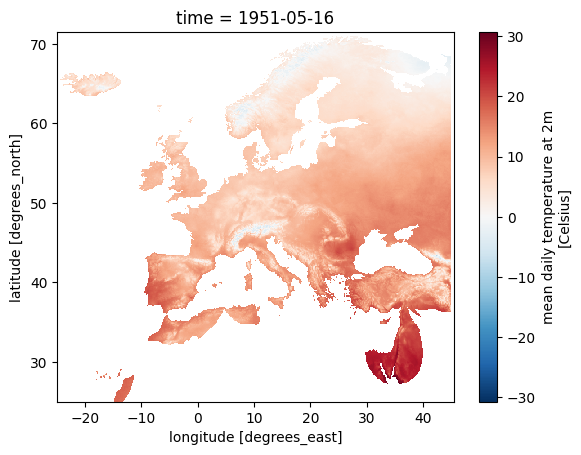

In [15]:
catalog['eobs v24.0e'].to_dask().data_vars["t2m"].isel(time=500).plot()